In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime
from scipy import signal
import pytz

## Tides Data

I could not manage to install the python package on my personal PC, however, I am in contact with Niklas for a solution to this problem. Therefore I used the website below for just downloading data sets. The coordinates of the center electrode are given with the height of 5 m above sea level. There is a restriction on the amount of data that is allowed to download at one time. Consequently, I downloaded two separate data sets from 2022-08-09 00:00 until 2022-10-08 00:00 with a sampling interval of 60 seconds (1 minute) on coordinates 53.77770269793558 N, 7.705661551004082 E. The second column "Signal" is the gravity variation in $\dfrac{nm}{s^{2}}$. Due to the data merging, I had to apply <code> pandas.drop_duplicates </code>.


GitHub link:
https://github.com/hydrogeoscience/pygtide

Web-site with a user interface:
https://groundwater.app/app.php?app=pygtide

In [2]:
#tides = pd.read_csv("../../Data/2023_07_27_Tides_grav/groundwater.app_pygtide.csv", parse_dates=[0], skiprows=3)

data1 = pd.read_csv("../../Data/2022_12_05_Tides_Grav/2022_0809_0908_grav.csv", parse_dates=[0])
data2 = pd.read_csv("../../Data/2022_12_05_Tides_Grav/2022_0908_1008_grav.csv", parse_dates=[0])
data3 = pd.read_csv("../../Data/2022_12_05_Tides_Grav/2022_1007_1106_grav.csv", skiprows=2 ,parse_dates=[0])
data4 = pd.read_csv("../../Data/2022_12_05_Tides_Grav/2022_1105_1205_grav.csv", skiprows=2 ,parse_dates=[0])
data5 = pd.read_csv("../../Data/2022_12_05_Tides_Grav/2022_1205_0104_grav.csv", skiprows=2 ,parse_dates=[0])
data6 = pd.read_csv("../../Data/2022_12_05_Tides_Grav/2023_0104_0203_grav.csv", skiprows=2 ,parse_dates=[0])
data7 = pd.read_csv("../../Data/2022_12_05_Tides_Grav/2023_0203_0305_grav.csv", skiprows=2 ,parse_dates=[0])
data8 = pd.read_csv("../../Data/2022_12_05_Tides_Grav/2023_0305_0404_grav.csv", skiprows=2 ,parse_dates=[0])

tides = pd.concat([data1, data2,data3, data4, data5, data6, data7, data8])


tides.rename(columns={'Datetime[UTC+0.0h]':'Datetime', 
                      'Signal [nm/s**2]': 'Signal', 
                      'Tide [nm/s**2]': 'Tide', 
                      'Pole tide [nm/s**2]' : 'Pole_tide', 
                      'LOD tide [nm/s**2]'  : 'LOD_tide'
                     }, inplace=True)


tides['Datetime'] = pd.to_datetime(tides['Datetime'], utc = pytz.timezone("Europe/London"))
tides

Datetime      Signal        Tide  Pole_tide  LOD_tide
0     2022-08-09 00:00:00+00:00  861.462922  818.384908  43.421935 -0.343921
1     2022-08-09 00:01:00+00:00  861.306205  818.228048  43.422079 -0.343922
2     2022-08-09 00:02:00+00:00  861.141826  818.063526  43.422222 -0.343922
3     2022-08-09 00:03:00+00:00  860.969657  817.891214  43.422366 -0.343923
4     2022-08-09 00:04:00+00:00  860.789571  817.710985  43.422509 -0.343923
...                         ...         ...         ...        ...       ...
43196 2023-04-03 23:56:00+00:00  -41.031225  -31.137749 -10.092257  0.198781
43197 2023-04-03 23:57:00+00:00  -38.512831  -28.619499 -10.092146  0.198814
43198 2023-04-03 23:58:00+00:00  -35.972353  -26.079164 -10.092035  0.198846
43199 2023-04-03 23:59:00+00:00  -33.409957  -23.516911 -10.091925  0.198879
43200 2023-04-04 00:00:00+00:00  -30.825836  -20.932934 -10.091814  0.198911

[345608 rows x 5 columns]

In [3]:
tides[tides['Datetime'] > datetime.datetime(2022,10,30,0, tzinfo=pytz.timezone("Europe/Berlin"))][::20].head(40)

Datetime      Signal        Tide  Pole_tide  LOD_tide
33068 2022-10-29 23:08:00+00:00 -233.464605 -267.073673  33.640976 -0.031908
33088 2022-10-29 23:28:00+00:00 -321.809684 -355.410987  33.633361 -0.032059
33108 2022-10-29 23:48:00+00:00 -405.339916 -438.933476  33.625758 -0.032199
33128 2022-10-30 00:08:00+00:00 -482.782913 -516.368751  33.618166 -0.032328
33148 2022-10-30 00:28:00+00:00 -552.961418 -586.539542  33.610572 -0.032449
33168 2022-10-30 00:48:00+00:00 -614.818179 -648.388593  33.602976 -0.032562
33188 2022-10-30 01:08:00+00:00 -667.437593 -701.000303  33.595377 -0.032667
33208 2022-10-30 01:28:00+00:00 -710.063703 -743.618715  33.587776 -0.032764
33228 2022-10-30 01:48:00+00:00 -742.114142 -775.661460  33.580172 -0.032854
33248 2022-10-30 02:08:00+00:00 -763.189811 -796.729442  33.572566 -0.032935
33268 2022-10-30 02:28:00+00:00 -773.080174 -806.612124  33.564959 -0.033009
33288 2022-10-30 02:48:00+00:00 -771.764158 -805.288433  33.557350 -0.033074
33308 2022-10-30 03:08:00+00:00 -759.406796 -792.923404  33.549740 -0.033132
33328 2022-10-30 03:28:00+00:00 -736.351814 -769.860762  33.542129 -0.033181
33348 2022-10-30 03:48:00+00:00 -703.110477 -736.611772  33.534518 -0.033223
33368 2022-10-30 04:08:00+00:00 -660.347084 -693.840733  33.526906 -0.033257
33388 2022-10-30 04:28:00+00:00 -608.861560 -642.347572  33.519295 -0.033283
33408 2022-10-30 04:48:00+00:00 -549.569655 -583.048037  33.511683 -0.033301
33428 2022-10-30 05:08:00+00:00 -483.481270 -516.952031  33.504073 -0.033312
33448 2022-10-30 05:28:00+00:00 -411.677491 -445.140640  33.496463 -0.033314
33468 2022-10-30 05:48:00+00:00 -335.286874 -368.742419  33.488854 -0.033308
33488 2022-10-30 06:08:00+00:00 -255.461543 -288.909495  33.481246 -0.033295
33508 2022-10-30 06:28:00+00:00 -173.353658 -206.794025  33.473641 -0.033273
33528 2022-10-30 06:48:00+00:00  -90.092730 -123.525524  33.466037 -0.033244
33548 2022-10-30 07:08:00+00:00   -6.764307  -40.189536  33.458435 -0.033206
33568 2022-10-30 07:28:00+00:00   75.609592   42.191917  33.450836 -0.033161
33588 2022-10-30 07:48:00+00:00  156.087858  122.677727  33.443240 -0.033108
33608 2022-10-30 08:08:00+00:00  233.825215  200.422615  33.435647 -0.033047
33628 2022-10-30 08:28:00+00:00  308.084365  274.689286  33.428057 -0.032978
33648 2022-10-30 08:48:00+00:00  378.245201  344.857632  33.420470 -0.032901
33668 2022-10-30 09:08:00+00:00  443.810907  410.430835  33.412888 -0.032816
33688 2022-10-30 09:28:00+00:00  504.410893  471.038307  33.405310 -0.032724
33708 2022-10-30 09:48:00+00:00  559.800559  526.435446  33.397736 -0.032623
33728 2022-10-30 10:08:00+00:00  609.857941  576.500289  33.390167 -0.032515
33748 2022-10-30 10:28:00+00:00  654.577377  621.227172  33.382603 -0.032398
33768 2022-10-30 10:48:00+00:00  694.060392  660.717621  33.375044 -0.032274
33788 2022-10-30 11:08:00+00:00  728.504062  695.168712  33.367491 -0.032142
33808 2022-10-30 11:28:00+00:00  758.187188  724.859245  33.359944 -0.032001
33828 2022-10-30 11:48:00+00:00  783.454652  750.134103  33.352403 -0.031853
33848 2022-10-30 12:08:00+00:00  804.700412  771.387241  33.344868 -0.031697

C:\Users\Memo\AppData\Local\Temp\ipykernel_9480\3922342370.py:4: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  days = np.arange(np.datetime64(np.datetime_as_string(np.datetime64(start_date))[:10]),
C:\Users\Memo\AppData\Local\Temp\ipykernel_9480\3922342370.py:5: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  np.datetime64(np.datetime_as_string(np.datetime64(end_date+datetime.timedelta(days=1)))[:10]), 4)


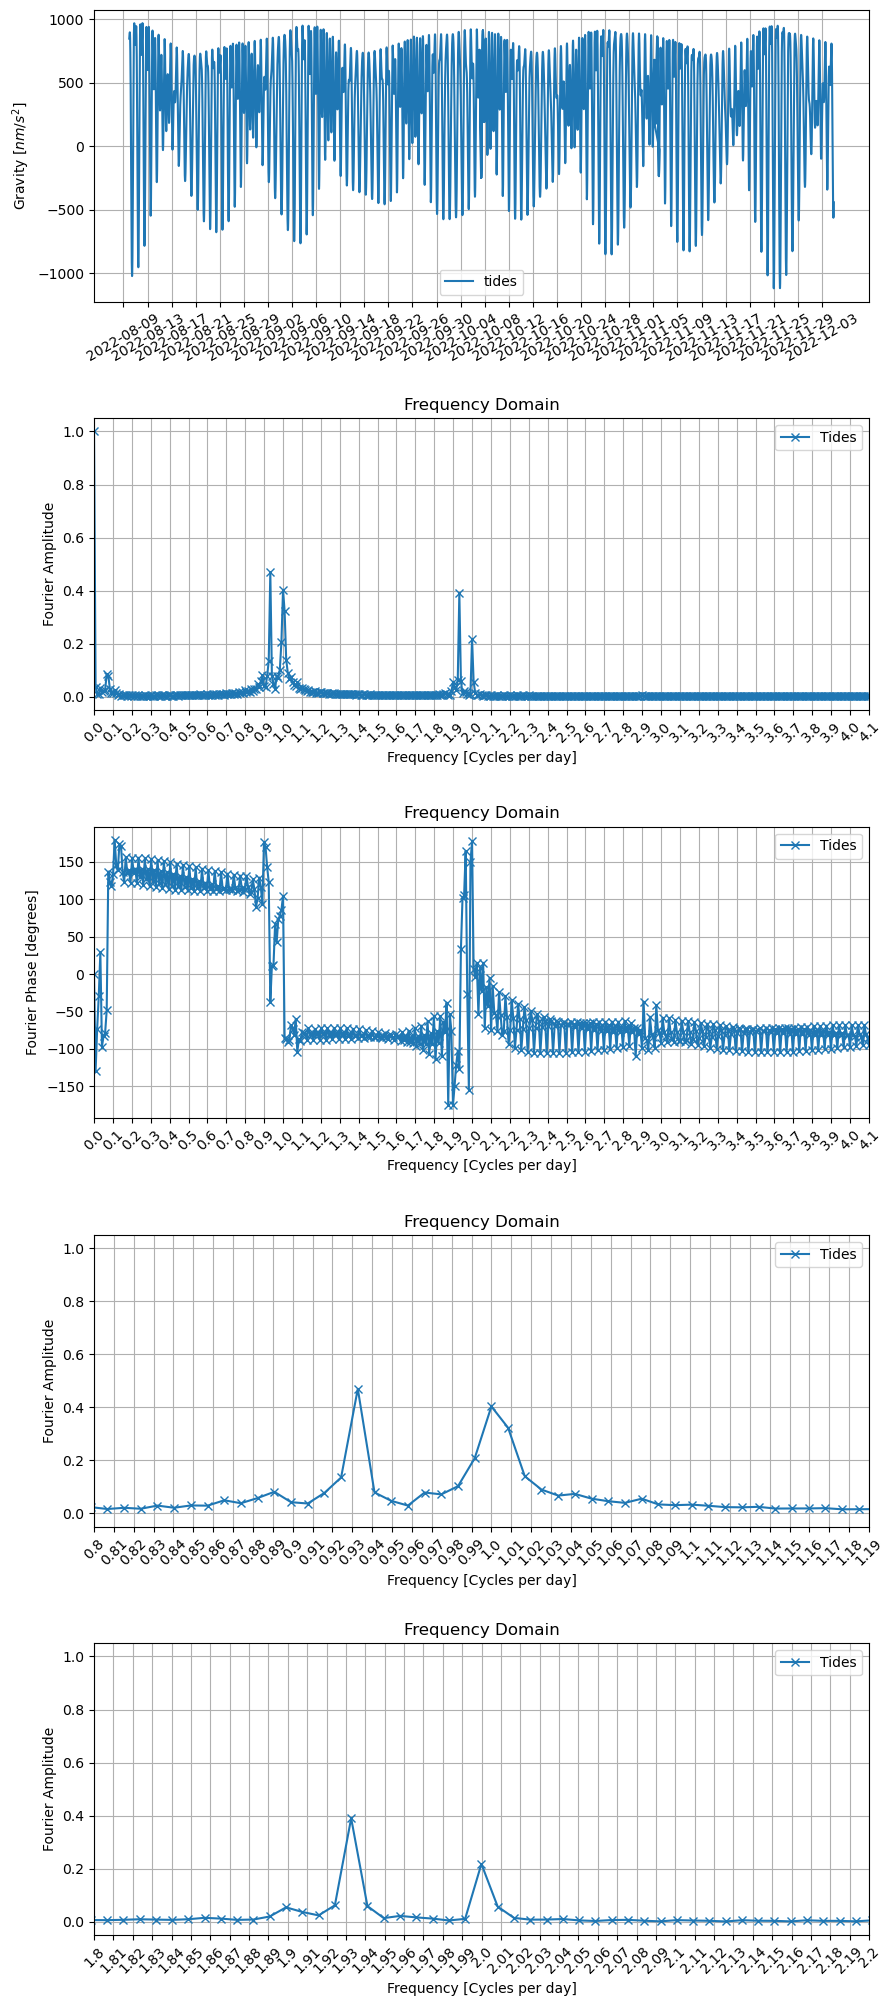

In [4]:
start_date = datetime.datetime(2022,8,10, tzinfo=pytz.timezone("Europe/Berlin"))
end_date = datetime.datetime(2022,12,5, tzinfo=pytz.timezone("Europe/Berlin"))

days = np.arange(np.datetime64(np.datetime_as_string(np.datetime64(start_date))[:10]),
         np.datetime64(np.datetime_as_string(np.datetime64(end_date+datetime.timedelta(days=1)))[:10]), 4)

tides_dated = tides[(tides['Datetime']>=start_date) &  (tides['Datetime']<=end_date)]
si = 60
X = tides_dated['Signal'].values
N = len(X)
F = np.fft.fft(X)/N
F_freq = np.fft.fftfreq(N, d=si)

one_side = N//2

fig , axes = plt.subplots(5, figsize=(10,5*5))
plt.subplots_adjust(hspace= 0.4)

ax = axes[0]

ax.plot(tides_dated['Datetime'] , tides_dated['Signal'], label="tides")
ax.set_xticks(days)
ax.tick_params('x',rotation=30)
ax.set_ylabel(r'Gravity $[nm/s^2]$')
ax.legend()
ax.grid()

ax = axes[1]
ax.plot(F_freq[:one_side], np.abs(F[:one_side])/max(np.abs(F[:one_side])), "x-", label='Tides')

x_freq_cpd = np.arange(0,4.2,0.1)
x_freq_hz = x_freq_cpd/(24*60*60)
ax.set_xlim(x_freq_hz[0], x_freq_hz[-1])
ax.set_xticks(x_freq_hz, labels= np.round(x_freq_cpd,1))
ax.tick_params('x',rotation=45)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Amplitude")
ax.legend()    
ax.grid()

ax = axes[2]
ax.plot(F_freq[:one_side], np.angle(F[:one_side])*180/np.pi, "x-", label='Tides')

x_freq_cpd = np.arange(0,4.2,0.1)
x_freq_hz = x_freq_cpd/(24*60*60)
ax.set_xlim(x_freq_hz[0], x_freq_hz[-1])
ax.set_xticks(x_freq_hz, labels= np.round(x_freq_cpd,1))
ax.tick_params('x',rotation=45)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Phase [degrees]")
ax.legend()    
ax.grid()

ax = axes[3]
ax.plot(F_freq[:one_side], np.abs(F[:one_side])/max(np.abs(F[:one_side])), "x-", label='Tides')

x_freq_cpd = np.arange(0.8,1.2,0.01)
x_freq_hz = x_freq_cpd/(24*60*60)
ax.set_xlim(x_freq_hz[0], x_freq_hz[-1])
ax.set_xticks(x_freq_hz, labels= np.round(x_freq_cpd,2))
ax.tick_params('x',rotation=45)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Amplitude")
ax.legend()    
ax.grid()

ax = axes[4]
ax.plot(F_freq[:one_side], np.abs(F[:one_side])/max(np.abs(F[:one_side])), "x-", label='Tides')

x_freq_cpd = np.arange(1.8,2.2,0.01)
x_freq_hz = x_freq_cpd/(24*60*60)
ax.set_xlim(x_freq_hz[0], x_freq_hz[-1])
ax.set_xticks(x_freq_hz, labels= np.round(x_freq_cpd,2))
ax.tick_params('x',rotation=45)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Amplitude")
ax.legend()    
ax.grid()
#fig.savefig("Output/Tides_FFT.pdf")

## Sea levels data set

Recent data sets can be downloaded from the following link:

https://www.pegelonline.wsv.de/webservices/files/Wasserstand+Rohdaten

However for older and larger data sets, it is more suitable to contact following email adress:

Datenstelle-M1@bafg.de




In [2]:
para_labels = ["Langeoog","Spiekeroog","Wangerooge_North","Wangerooge_West"]
data_path = '../../Data/2023_03_28_sealevels/'
directory_labels = ["Langeoog-W1.zrx","Spiekeroog-W1.zrx", "Wangerooge-Nord-W1.zrx", "Wangerooge-West-W1.zrx"]

for i in range(4):
    
    locals()[para_labels[i]] = Langeoog = pd.read_csv(data_path+directory_labels[i], skiprows=6, 
                                                      sep="\s+", parse_dates=[0], header=None)
    locals()[para_labels[i]][0] = pd.to_datetime(locals()[para_labels[i]][0], 
                                                           utc = pytz.timezone("Europe/Berlin"))
    locals()[para_labels[i]].rename(columns={0:"Date_Time", 1:"W_cm"}, inplace=True)

Langeoog

KeyboardInterrupt: 

In [ ]:
Langeoog[Langeoog['Date_Time'] > datetime.datetime(2022,10,30,0, tzinfo=pytz.timezone("Europe/Berlin"))][::20].head(40)

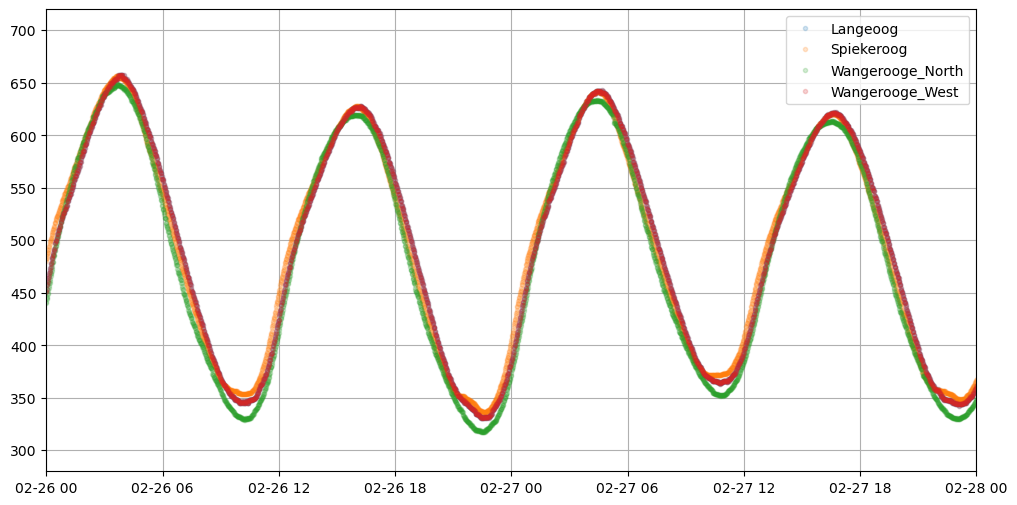

In [7]:
fig, ax = plt.subplots(1, figsize=(12, 6))

for i in range(4):
    ax.plot(locals()[para_labels[i]]["Date_Time"], locals()[para_labels[i]]["W_cm"], ".", alpha=0.2, label=para_labels[i])
ax.set_xlim(datetime.datetime(2023,2,26), datetime.datetime(2023,2,28))
ax.set_ylim(280,720)
ax.legend()
ax.grid()
#fig.savefig("Output/Pegeldaten_2019.pdf")

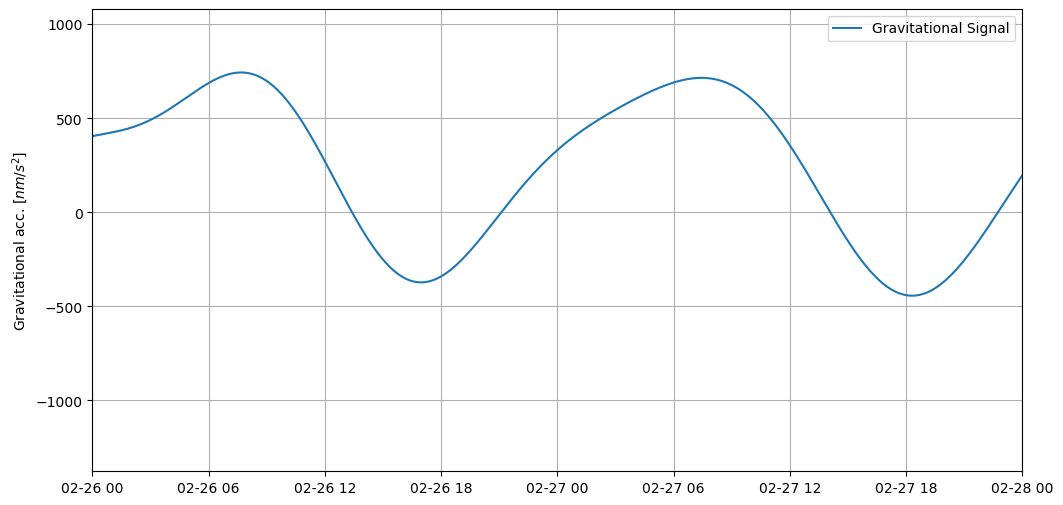

In [8]:
fig, ax = plt.subplots(1, figsize=(12, 6))

ax.plot(tides['Datetime'], tides['Signal'], label='Gravitational Signal')
ax.set_ylabel(r'Gravitational acc. [$nm/s^2$]')
ax.legend(loc='lower right')

ax.set_xlim(datetime.datetime(2023,2,26), datetime.datetime(2023,2,28))
ax.legend()
ax.grid()


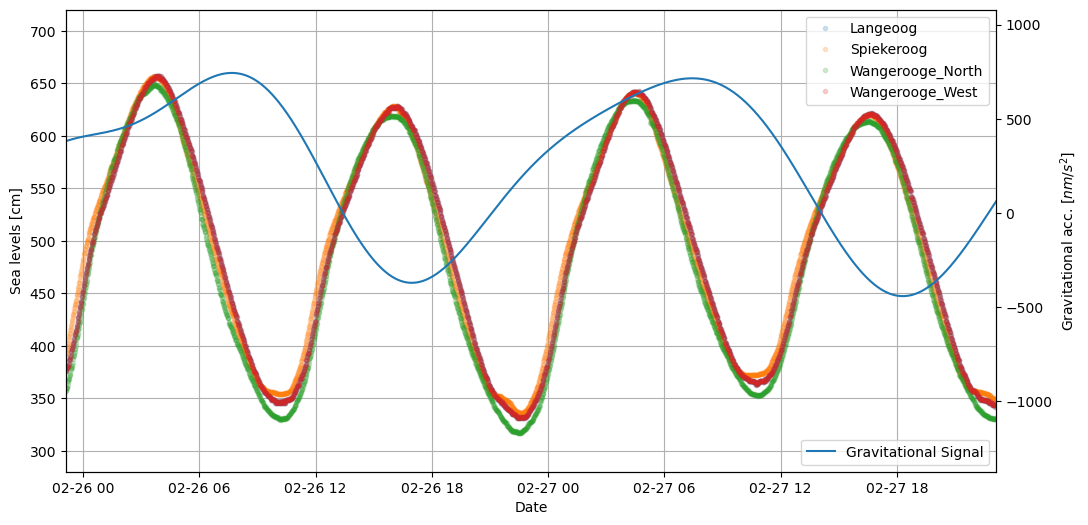

In [9]:
fig, ax = plt.subplots(1, figsize=(12, 6))

for i in range(4):
    ax.plot(locals()[para_labels[i]]["Date_Time"], locals()[para_labels[i]]["W_cm"], ".", alpha=0.2, label=para_labels[i])
ax.set_xlim(datetime.datetime(2023,2,26, tzinfo=pytz.timezone("Europe/Berlin")),
            datetime.datetime(2023,2,28, tzinfo=pytz.timezone("Europe/Berlin")))
ax.set_ylim(280,720)
ax.legend()
ax.grid()
ax.set_ylabel('Sea levels [cm]')
ax.set_xlabel('Date')


ax1 = ax.twinx()
ax1.plot(tides['Datetime'], tides['Signal'], label='Gravitational Signal')
ax1.set_ylabel(r'Gravitational acc. [$nm/s^2$]')
ax1.legend(loc='lower right')

#fig.savefig("Output/Sealevels_tides.pdf")

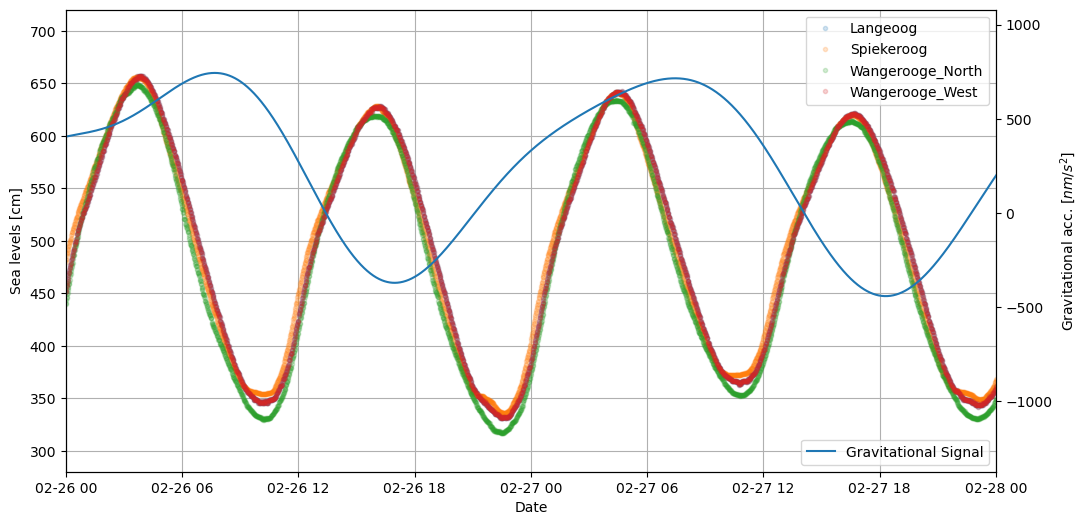

In [10]:
fig, ax = plt.subplots(1, figsize=(12, 6))

for i in range(4):
    ax.plot(locals()[para_labels[i]]["Date_Time"], locals()[para_labels[i]]["W_cm"], ".", alpha=0.2, label=para_labels[i])
ax.set_xlim(datetime.datetime(2023,2,26), datetime.datetime(2023,2,28))
ax.set_ylim(280,720)
ax.legend()
ax.grid()
ax.set_ylabel('Sea levels [cm]')
ax.set_xlabel('Date')


ax1 = ax.twinx()
ax1.plot(tides['Datetime'], tides['Signal'], label='Gravitational Signal')
ax1.set_ylabel(r'Gravitational acc. [$nm/s^2$]')
ax1.legend(loc='lower right')

#fig.savefig("Output/Sealevels_tides.pdf")

## FFT of Tides & Sea levels

It is more suitable if both data sets have the same sampling frequency, to compare the results.

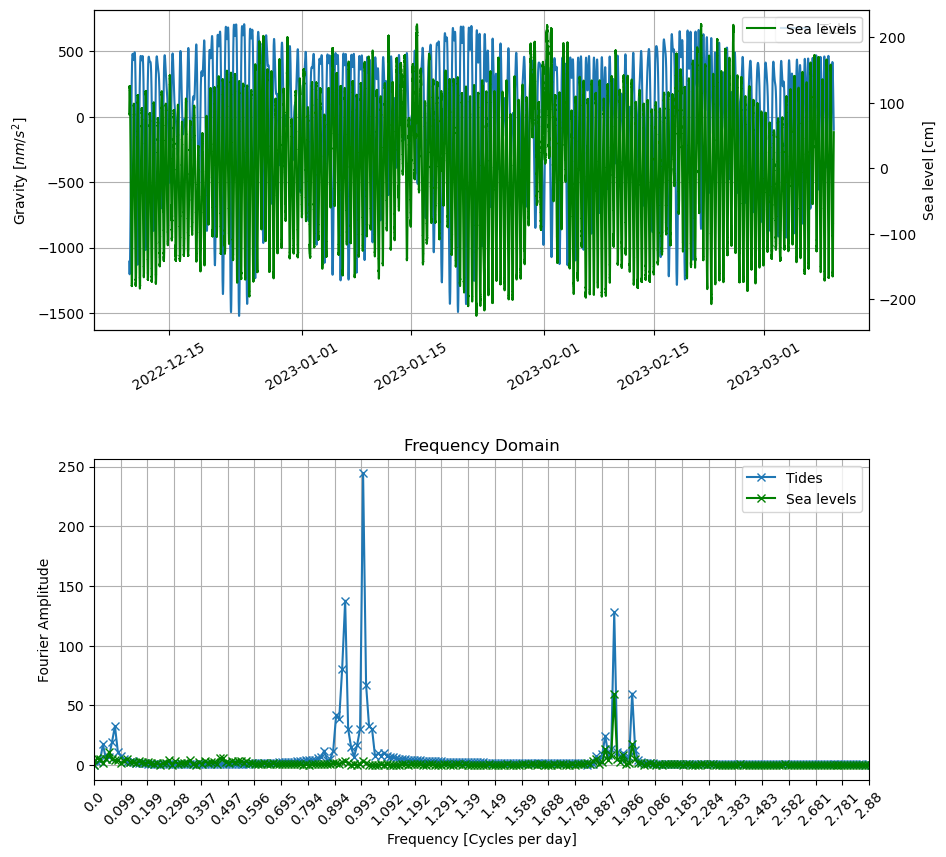

In [11]:
#start_date = datetime.datetime(2022,8,10,15,1,30)
#end_date = datetime.datetime(2022,9,12,23,30)

#start_date = datetime.datetime(2022,8,18,15,1,30)
#end_date = datetime.datetime(2022,9,5,23,30)

start_date = datetime.datetime(2022,12,10, tzinfo= pytz.timezone("Europe/Berlin"))
end_date = datetime.datetime(2023,3,10, tzinfo= pytz.timezone("Europe/Berlin"))


tides_dated = tides[(tides['Datetime']>=start_date) &  (tides['Datetime']<=end_date)]
X_tides = signal.detrend(tides_dated['Signal'].values)
N_tides = len(X_tides)
F_tides = np.fft.fft(X_tides)/N_tides
SI_tides = (tides['Datetime'].iloc[1] - tides['Datetime'].iloc[0]).total_seconds()
F_freq_tides = np.fft.fftfreq(N_tides, d=SI_tides//60 )
one_side_tides =N_tides//2

Langeoog_dated = Langeoog[(Langeoog['Date_Time']>=start_date) &  (Langeoog['Date_Time']<=end_date)]
X_sea = signal.detrend(Langeoog_dated['W_cm'].values)
N_sea = len(X_sea)
F_sea = np.fft.fft(X_sea)/N_sea
SI_sea = (Langeoog['Date_Time'].iloc[1] - Langeoog['Date_Time'].iloc[0]).total_seconds()
F_freq_sea = np.fft.fftfreq(N_sea, d=SI_sea//60)
one_side_sea = N_sea//2

fig , axes = plt.subplots(2, figsize=(10,10))
plt.subplots_adjust(hspace= 0.4)

ax = axes[0]

ax.plot(tides_dated['Datetime'] , X_tides, label="Tides")
ax.set_ylabel(r'Gravity $[nm/s^2]$')

ax1 = ax.twinx()
ax1.plot(Langeoog_dated['Date_Time'], X_sea, color="green", label="Sea levels")
ax1.set_ylabel('Sea level [cm]')

ax.tick_params(axis ='x', labelrotation =30)
ax1.tick_params(axis='x',  which='both', bottom=False, top=False, labelbottom=False)
ax1.legend()
ax.legend()
ax.grid()

ax = axes[1]

ax.plot(F_freq_tides[:one_side_tides], np.abs(F_tides[:one_side_tides]), 'x-', label='Tides')
ax.plot(F_freq_sea[:one_side_sea], np.abs(F_sea[:one_side_sea]), "x-",  color='green', label='Sea levels')



#################### Normalized
#ax.plot(F_freq_tides[:one_side_tides], np.abs(F_tides[:one_side_tides])/max(np.abs(F_tides[:one_side_tides])),
#        'x-', label='Tides')

#ax.plot(F_freq_sea[:one_side_sea], np.abs(F_sea[:one_side_sea])/max(np.abs(F_sea[:one_side_sea])), 
#        "x-",  color='green', label='Sea levels')



x_freq_bot = 0
x_freq_top = 0.002
ax.set_xlim(x_freq_bot, x_freq_top)
x_freq_ticks = np.linspace(x_freq_bot, x_freq_top,30 )
ax.set_xticks(x_freq_ticks, labels=np.round(x_freq_ticks*(24*60), 3))
ax.tick_params('x',rotation=45)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Amplitude")
ax.legend()    
ax.grid()


#fig.savefig("Output/Tides_sealevels_FFT.pdf")

## Filter

si = 60
sec = 1/si #SAMPLING RATE IN SEC
high_freq_hour = 5.5
low_freq_hour  = 7
high_freq = 1/(high_freq_hour*60*60*sec) 
low_freq  = 1/(low_freq_hour*60*60*sec)  


sos_12 = signal.butter(2, [low_freq, high_freq], 'bandpass', output='sos')

sec = 1/si #SAMPLING RATE IN SEC
high_freq_hour = 11
low_freq_hour  = 12.5
high_freq = 1/(high_freq_hour*60*60*sec) 
low_freq  = 1/(low_freq_hour*60*60*sec)  


sos_24 = signal.butter(2, [low_freq, high_freq], 'bandpass', output='sos')
#geolore_data_dated_filtered = signal.sosfilt(sos, geolore_data_dated.iloc[: , 2].values)

tides["Signal_filtered"] = signal.sosfilt(sos_12, tides["Signal"].values)
tides["Signal_filtered_1"] = signal.sosfilt(sos_24, tides["Signal"].values)


#start_date = datetime.datetime(2022,8,10,15)
#end_date = datetime.datetime(2022,8,21)

#start_date = datetime.datetime(2022,8,18,15,1,30)
#end_date = datetime.datetime(2022,9,5,23,30)

#start_date = datetime.datetime(2022,8,10)
#end_date = datetime.datetime(2022,10,8)

days = np.arange(np.datetime64(np.datetime_as_string(np.datetime64(start_date))[:10]),
         np.datetime64(np.datetime_as_string(np.datetime64(end_date+datetime.timedelta(days=1)))[:10]), 4)

tides_dated = tides[(tides['Datetime']>=start_date) &  (tides['Datetime']<=end_date)]
X = tides_dated['Signal'].values
N = len(X)
F = np.fft.fft(X)/N
F_freq = np.fft.fftfreq(N, d=si )

X_filtered = tides_dated['Signal_filtered'].values
F_filtered = np.fft.fft(X_filtered)/N


X_filtered_1 = tides_dated['Signal_filtered_1'].values
F_filtered_1 = np.fft.fft(X_filtered_1)/N

one_side = N//2

fig , axes = plt.subplots(3, figsize=(10,15))
plt.subplots_adjust(hspace= 0.4)

ax = axes[0]

ax.plot(tides_dated['Datetime'] , tides_dated['Signal'], label="tides")
ax.plot(tides_dated['Datetime'] , tides_dated['Signal_filtered'], label="~12h filtered")
ax.plot(tides_dated['Datetime'] , tides_dated['Signal_filtered_1'], label="~24h filtered")
ax.set_ylabel(r'Gravity $[nm/s^2]$')
ax.set_xticks(days)
ax.tick_params(axis ='x', labelrotation =30)
ax.legend()
ax.grid()

ax = axes[1]
ax.plot(F_freq[:one_side], np.abs(F[:one_side])/max(np.abs(F[:one_side])), "x-", label='Tides')

ax.plot(F_freq[:one_side], np.abs(F_filtered[:one_side])/max(np.abs(F_filtered[:one_side])), 
        'x-', color='orange',label='~12h filtered')

ax.plot(F_freq[:one_side], np.abs(F_filtered_1[:one_side])/max(np.abs(F_filtered_1[:one_side])), 
        'x-', color='green',label='~24h filtered')


x_freq_bot = 0
x_freq_top = 0.00005
ax.set_xlim(x_freq_bot, x_freq_top)
x_freq_ticks = np.linspace(x_freq_bot, x_freq_top,30 )
ax.set_xticks(x_freq_ticks, labels=np.round(x_freq_ticks*(24*60*60), 3))
ax.tick_params('x',rotation=45)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Amplitude")
ax.legend()    
ax.grid()

ax = axes[2]
ax.plot(F_freq[:one_side], np.angle(F[:one_side])*180/np.pi, "x-", label='Tides')

ax.plot(F_freq[:one_side], np.angle(F_filtered[:one_side])*180/np.pi, 
        'x-', color='orange',label='~12h filtered')

ax.plot(F_freq[:one_side], np.angle(F_filtered_1[:one_side])*180/np.pi, 
        'x-', color='green',label='~24h filtered')



x_freq_bot = 0
x_freq_top = 0.00005
ax.set_xlim(x_freq_bot, x_freq_top)
x_freq_ticks = np.linspace(x_freq_bot, x_freq_top,30 )
ax.set_xticks(x_freq_ticks, labels=np.round(x_freq_ticks*(24*60*60), 3))
ax.tick_params('x',rotation=45)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Phase [degrees]")
ax.legend()    
ax.grid()

#fig.savefig("Output/Tides_butterworth_filtered_FFT.pdf")

## Cleaning the outliers (in porgress)

periodic spline is needed

https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html


geolore_interpolated = geolore_60s.copy()
geolore_interpolated[~(((geolore_60s.index > datetime.datetime(2022,8,10,14,13)) &
        (geolore_60s.index < datetime.datetime(2022,8,17,18,50))) |
        ((geolore_60s.index > datetime.datetime(2022,8,18,14,0)) &
        (geolore_60s.index < datetime.datetime(2022,9,6,8,22))) |
        (geolore_60s.index > datetime.datetime(2022,9,7,4,45)))] = None
geolore_interpolated_ = geolore_interpolated.interpolate("cubic", order=1).dropna()
geolore_interpolated_nan = geolore_interpolated.dropna()

fig, ax = plt.subplots(1 , figsize = (12,5 ))

#ax.set_xlim(datetime.datetime(2022,8,8), datetime.datetime(2022,9,14))
ax.plot(geolore_interpolated_.index, geolore_interpolated_.iloc[:,2], color="blue", label='interpolated')
ax.plot(geolore_60s.iloc[:,2], color="green", alpha=0.4,label='Raw')
ax.plot(geolore_interpolated.index, geolore_interpolated.iloc[:,2], "--" , 
        dashes=(5, 20),  color="orange", label='without outlier')
#ax.set_ylim(0.002, 0.012)
ax.legend()
#ax.set_xlim(datetime.datetime(2022,8,17),datetime.datetime(2022,8,19))

#start_date = datetime.datetime(2022,8,10,15,1,30)
#end_date = datetime.datetime(2022,9,12,23,30)

start_date = datetime.datetime(2022,8,8,15,1,30)
end_date = datetime.datetime(2022,9,14,23,30)


tides_dated = tides[(tides['Datetime']>=start_date) &  (tides['Datetime']<=end_date)]
X = tides_dated['Signal'].values
N = len(X)
F = np.fft.fft(X)/N
F_freq = np.fft.fftfreq(N, d=1 )


geolore_data_dated = geolore_interpolated_[(geolore_interpolated_.index>=start_date) &
                                              (geolore_interpolated_.index<=end_date)]



X_data = geolore_data_dated.iloc[: , 2].values
N_data = len(X_data)
F_data = np.fft.fft(X_data)/N_data
F_data_detrended = np.fft.fft(signal.detrend(geolore_data_dated.iloc[:,2]))/N_data
F_freq_data = np.fft.fftfreq(N_data, d=1)

one_side = N//2

fig , axes = plt.subplots(3, figsize=(10,15))
plt.subplots_adjust(hspace= 0.4)

ax = axes[0]

ax.plot(tides_dated['Datetime'] , tides_dated['Signal'], label="tides")
ax.set_ylabel(r'Gravity $[nm/s^2]$')

ax1 = ax.twinx()
ax1.plot(geolore_data_dated.iloc[:,2], color="green", label="data")
ax1.plot(geolore_data_dated.index , signal.detrend(geolore_data_dated.iloc[:,2]), color="orange", label="detrended")
ax1.set_ylabel('Potential [V]')
ax1.set_ylim(-0.004, 0.012)

ax.tick_params(axis ='x', labelrotation =30)
ax1.tick_params(axis='x',  which='both', bottom=False, top=False, labelbottom=False)
ax1.legend()
ax.legend()
ax.grid()

ax = axes[1]
ax.plot(F_freq[:one_side], np.abs(F[:one_side])/max(np.abs(F[:one_side])), "x-", label='Tides')

ax.plot(F_freq_data[:one_side], np.abs(F_data[:one_side])/max(np.abs(F_data[:one_side])), 'x-', color='green',label='Data')


ax.plot(F_freq_data[:one_side], np.abs(F_data_detrended[:one_side])/max(np.abs(F_data_detrended[:one_side])),
        'x-', label='detrended')
#ax.plot(F_freq_data[:one_side], np.abs(F_data_detrended[:one_side]), 'x-', label='detrended')

x_freq_bot = 0
x_freq_top = 0.002
ax.set_xlim(x_freq_bot, x_freq_top)
x_freq_ticks = np.linspace(x_freq_bot, x_freq_top,30 )
ax.set_xticks(x_freq_ticks, labels=np.round(x_freq_ticks*(24*60), 3))
ax.tick_params('x',rotation=45)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Amplitude")
ax.legend()    
ax.grid()

ax = axes[2]
ax.plot(F_freq[:one_side], np.angle(F[:one_side])*180/np.pi, "x-", label='Tides')

ax.plot(F_freq_data[:one_side], np.angle(F_data[:one_side])*180/np.pi, 'x-', color='green',label='Data')


ax.plot(F_freq_data[:one_side], np.angle(F_data_detrended[:one_side])*180/np.pi,'x-', label='detrended')
#ax.plot(F_freq_data[:one_side], np.abs(F_data_detrended[:one_side]), 'x-', label='detrended')

x_freq_bot = 0
x_freq_top = 0.002
ax.set_xlim(x_freq_bot, x_freq_top)
x_freq_ticks = np.linspace(x_freq_bot, x_freq_top,30 )
ax.set_xticks(x_freq_ticks, labels=np.round(x_freq_ticks*(24*60), 3))
ax.tick_params('x',rotation=45)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Phase [degrees]")
ax.legend()    
ax.grid()


print(len(X)==len(X_data))

#fig.savefig("Output/Tides_Geolore_FFT.pdf")

In [ ]:
geolore_interpolated_

In [33]:
datetime.datetime(2019,7,1,10,2,8) - datetime.datetime(2019,6,28,20,37,54)

datetime.timedelta(days=2, seconds=48254)

In [23]:
print(len(X_tides),len(X_sea))

129604 129601
